In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#Data Processing
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Basic DataViz tools
import matplotlib
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 300
import seaborn as sns
sns.set_palette('husl')

plt.rc('figure', figsize=(17,13))
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.subplots import make_subplots

# Special Visualization
import wordcloud, missingno
from wordcloud import WordCloud
import missingno as msno
import networkx as nx



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv


## Importing the Data

In [8]:
first_import = pd.read_csv('../input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv')
first_import.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


## Describing the dataset to understand her a little more

In [9]:
first_import.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


## Using a For loop to see if the dataset has any missing values.

In [10]:
for col in first_import.columns:
    pct_missing = np.mean(first_import[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

Name - 0.0%
Author - 0.0%
User Rating - 0.0%
Reviews - 0.0%
Price - 0.0%
Year - 0.0%
Genre - 0.0%


## Checkin Missing Data using Missingno
* missingno provides a small toolset of flexible and easy-to-use missing data visualizations and utilities that allows you to get a quick visual summary of the completeness (or lack thereof) of your dataset.

<AxesSubplot:>

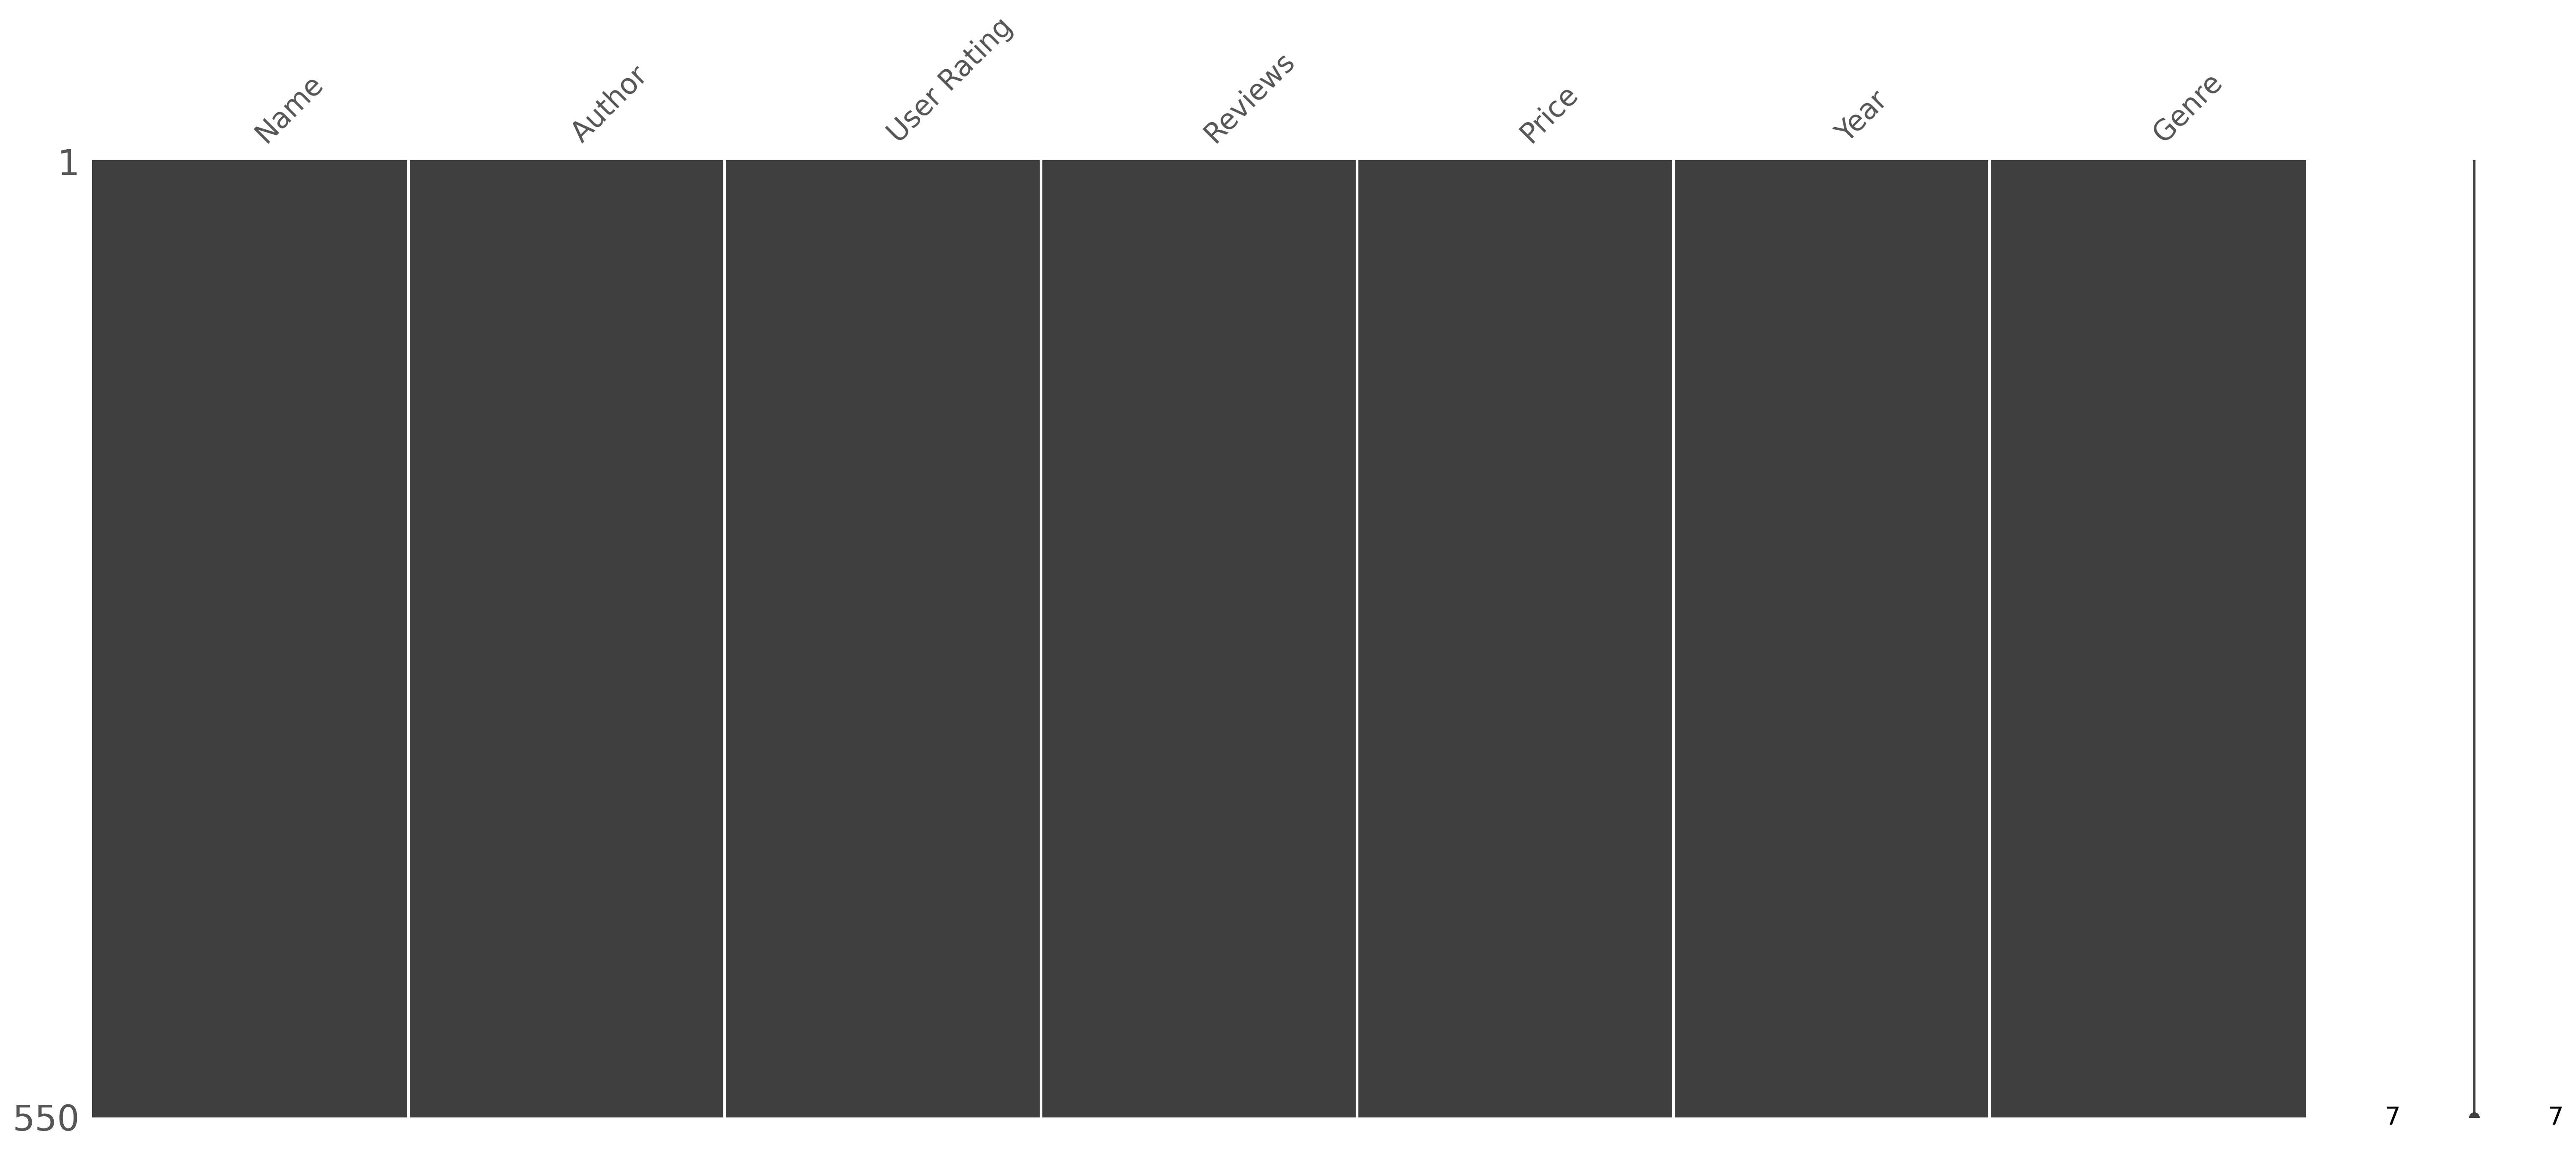

In [11]:
msno.matrix(first_import)

The dataset has no missing values

## Sorting the values to see the top User Rating with most Reviews

In [12]:
first_import.sort_values(['User Rating', 'Reviews'], ascending=[False, False])

,Name,Author,User Rating,Reviews,Price,Year,Genre
245,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2012,Fiction
246,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2013,Fiction
247,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2014,Fiction
248,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2015,Fiction
249,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2016,Fiction
...,...,...,...,...,...,...,...
22,Allegiant,Veronica Roth,3.9,6310,13,2013,Fiction
106,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,2012,Fiction
107,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,2013,Fiction
132,Go Set a Watchman: A Novel,Harper Lee,3.6,14982,19,2015,Fiction


# Bestseller's User Ratings Count:

In [13]:
temp_df = first_import['User Rating'].value_counts().reset_index()

# Creating trace1
trace1 = go.Bar(x = temp_df['index'], 
                y = temp_df['User Rating'],
                marker = dict(color = 'rgb(255, 165, 0)',
                             line = dict(color='rgb(0,0,0)', width=1.5)))

layout = go.Layout(template = 'plotly_dark',
                   title = 'Ratings Count', 
                   xaxis = dict(title = "Rating"),
                   yaxis = dict(title = 'Count'))

fig = go.Figure(data = [trace1], layout = layout)
fig.show()

## Piechart showing the distribution

In [14]:
# Function to plot a pie using the library plotly
def pie_plot(cnt_srs, title):
        labels=cnt_srs.index
        values=cnt_srs.values
        trace = go.Pie(labels=labels,
                   values=values,
                   title=title,
                   hoverinfo='percent+value',
                   textinfo='percent',
                   textposition='inside',
                   hole=0.7,
                   showlegend=True,
                   marker=dict(colors=plt.cm.viridis_r(np.linspace(0, 1, 14)),
                              line=dict(color='#000000', width=2),
                              )
                  )
        return trace
py.iplot([pie_plot(first_import['User Rating'].value_counts(), 'Rating')])

**Most of the Ragings are in the range of 4.6 to 4.8**

## Relationship between Price and User Rating

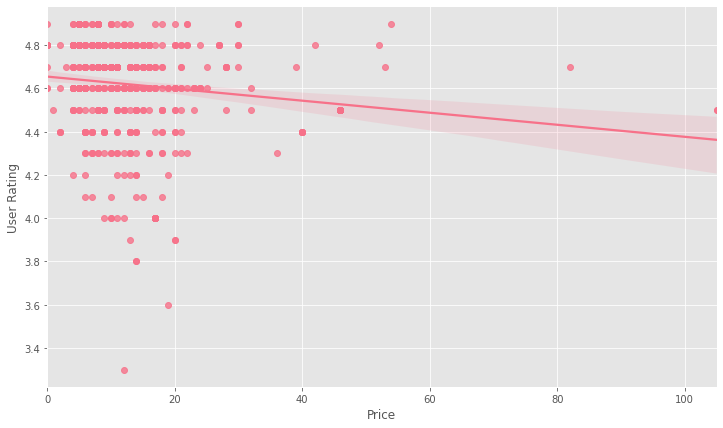

In [15]:
fig, ax= plt.subplots(1,1, figsize=(12, 7), dpi=72)
sns.regplot(data=first_import, x='Price', y='User Rating', ax=ax)
plt.show()

* The user Ragins tends to show a slight negative correlation with Price of the Bestselling Book
* Most of the books are in the 'Last than 50' price range, so not much conclusion can be drawn.

# Relationship between Price and Reviews:

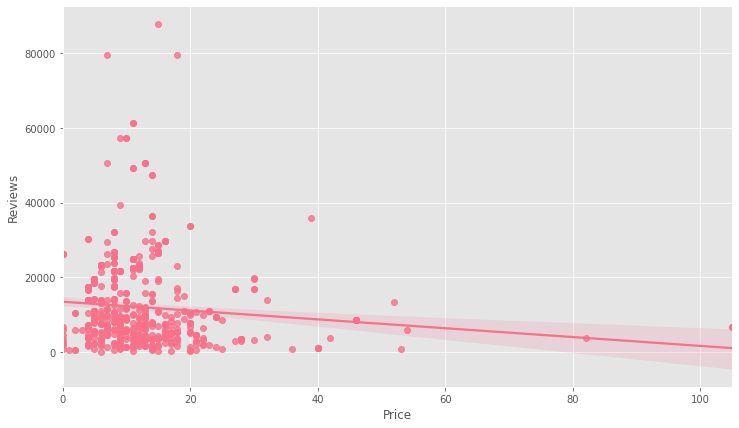

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7), dpi=72)
sns.regplot(data=first_import, x='Price', y='Reviews', ax=ax)
plt.show()

Reviews and Price also tend to show an almost similar correlation as User Rating and Price. But again as most of the Bestsellers are crowded in a lower Price range, we can't conclude much.

# Fiction and Non-Fiction Bestsellers

In [17]:
temp_df = first_import['Genre'].value_counts().reset_index()

# Creating trace1
trace1 = go.Bar(x = temp_df['index'],
                y= temp_df['Genre'],
                marker = dict(color='rgb(255,165, 0)',
                             line=dict(color='rgb(0,0,0)', width=1.5)))
layout = go.Layout(template = 'plotly_dark', xaxis = dict(title='Genre'), 
                  yaxis = dict(title='Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

In [18]:
# Creating a Function to plot a pie chart

def pie_plot(cnt_srs, colors, title):
        labels=cnt_srs.index
        values=cnt_srs.values
        trace = go.Pie(labels=labels,
                   values=values,
                   title=title,
                   hoverinfo='percent+value',
                   textinfo='percent',
                   textposition='inside',
                   hole=0.7,
                   showlegend=True,
                   marker=dict(colors=colors,
                              line=dict(color='#000000', width=2),
                              )
                  )
        return trace

py.iplot([pie_plot(first_import['Genre'].value_counts(), ['magenta',
                                                         'cyan'], 'GENRE')])

**There are more Non-Fiction Bestsellers than Fiction**

# Looking at Ratings by Genre

In [21]:
# Ratings by Genre

df1= first_import[first_import['Genre'] == 'Fiction']
df2= first_import[first_import['Genre'] == 'Non Fiction']

temp_df1=df1['User Rating'].value_counts().reset_index()
temp_df2=df2['User Rating'].value_counts().reset_index()

# Creating Trace1
trace1 = go.Bar( x = temp_df1['index'],
                 y = temp_df1['User Rating'],
                 name = 'Fiction',
                 marker=dict(color = 'rgb(249,6,6)',
                            line=dict(color='rgb(0,0,0)', width=1.5)))
#Creating Trace2
trace2 = go.Bar(x = temp_df2['index'],
                y = temp_df2['User Rating'],
                name = 'Non Fiction',
                marker=dict(color = 'rgb(26,118,255)', 
                            line=dict(color='rgb(0,0,0)', width=1.5))) 
                
#Creating the layout
layout = go.Layout(template='plotly_dark', title='Rating by Genre',
                   xaxis = dict(title = 'Rating'), yaxis= dict(title = 'Count'))
        
                
fig = go.Figure(data = [trace1, trace2], layout = layout)
fig.show()

* For ratings less than 4.8,Non-Fiction books count overpowers Fiction books. But the reverse can be seen for the ratings-4.8 and 4.9.This is an important point as ,earlier we have seen that non-fiction books have an overall higher count in the entire dataset.

# Reviews, Ratings and Price of BestSellers

In [27]:
temp_df1 = first_import.groupby('Year').mean().reset_index()

#Creating trace1 (first graph)

trace1 = go.Bar(x = temp_df1['Year'],
                y = temp_df1['Reviews'],
                marker = dict(color = 'rgb(255, 165, 0)',
                             line=dict(color = 'rgb(0,0,0)', width = 1.5)))


#Creating the layout for the first graph
layout = go.Layout(template = 'plotly_dark', 
                   title = 'Average Reviews Over The Years',
                   xaxis = dict(title = 'Year'), yaxis = dict(title = 'Average Reviews'))
                   
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

#Creating trace2 (second graph)
trace2 = go.Bar(x = temp_df1['Year'],
                y = temp_df1['Price'],
                marker = dict(color = 'rgb(148, 103, 189)',
                             line=dict(color = 'rgb(0,0,0)', width = 1.5)))


#Creating the layout for the second graph
layout2 = go.Layout(template = 'plotly_dark',
                   title = 'Average Price Over The Years',
                   xaxis = dict(title = 'Year'), yaxis = dict(title = 'Average Price'))

fig = go.Figure(data = [trace2], layout = layout2)
fig.show()

#Creating trace3 (third graph)
trace3 = go.Bar(x = temp_df1['Year'],
                y = temp_df2['User Rating'],
                marker = dict(color = 'rgb(250, 13, 92)',
                             line=dict(color='rgb(0,0,0)', width=1.5)))

# Creating the Layout for the Third Graph
layout3 = go.Layout(template = 'plotly_dark',
                    title = 'Average Rating Over The Years',
                    xaxis = dict(title = 'Year'), yaxis = dict(title = 'Average Rating'))
fig = go.Figure(data = [trace3], layout = layout3)
fig.show()

# Reviews and Price of the bestsellers by genre over the years

In [30]:
df1 = first_import[first_import['Genre'] == 'Fiction']
df2 = first_import[first_import['Genre'] == 'Non Fiction']

temp_df1 = df1.groupby('Year').mean().reset_index()
temp_df2 = df2.groupby('Year').mean().reset_index()

# Creating trace1 and trace2 for the reviews by genre graph

trace1 = go.Bar(x = temp_df1['Year'],
                y = temp_df1['Reviews'],
                name = 'Fiction',
                marker = dict(color = 'rgb(246, 6, 6)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))

trace2 = go.Bar(x = temp_df2['Year'],
                y = temp_df2['Reviews'],
                name = 'Non Fiction',
                marker = dict(color = 'rgb(26, 118, 255)',
                             line=dict(color='rgb(0,0,0)', width=1.5)))

#Creating the Layout of the first graph
layout1 = go.Layout(template = 'plotly_dark',
                    title = 'Average Reviews By Genre Over The Years',
                    xaxis = dict(title = 'Year'), yaxis = dict(title = 'Average Reviews'))

fig = go.Figure(data = [trace1, trace2], layout = layout1)
fig.show()

# Creating trace3 and trace4 for the Price by Genre Grahp

trace3 = go.Bar(x = temp_df1['Year'],
                y = temp_df1['Price'],
                name = 'Fiction',
                marker = dict(color = 'rgb(249, 6, 6)',
                             line=dict(color = 'rgb(0,0,0)', width=1.5)))

trace4 = go.Bar(x = temp_df2['Year'],
                y = temp_df2['Price'],
                name = 'Non Fiction',
                marker = dict(color = 'rgb(26, 118, 255)',
                             line=dict(color = 'rgb(0,0,0)', width=1.5)))

#Creating the Layout for the second graph
layout2 = go.Layout(template = 'plotly_dark',
                    title = 'Average Price By Genre Over The Years',
                    xaxis = dict(title = 'Year'), yaxis = dict(title = 'Average Price'))

fig = go.Figure(data = [trace3, trace4], layout = layout2)
fig.show()

# Autores com BestSellers em ambos os generos: Ficção e Não-Ficção

In [32]:
first_import[first_import['Author'].isin(list(first_import.groupby(['Author', 'Genre']).count().reset_index()['Author'].value_counts()[:2].index))]

,Name,Author,User Rating,Reviews,Price,Year,Genre
28,Baby Touch and Feel: Animals,DK,4.6,5360,5,2015,Non Fiction
158,Harry Potter Coloring Book,Scholastic,4.7,3564,9,2015,Non Fiction
268,Pokémon Deluxe Essential Handbook: The Need-to...,Scholastic,4.7,3503,9,2016,Fiction
514,Ultimate Sticker Book: Frozen: More Than 60 Re...,DK,4.5,2586,5,2014,Fiction


# Year Based Analysis of Reviews, Ratings and Price of BestSellers

In [37]:
df1 = first_import[first_import['Genre'] == 'Fiction']
df2 = first_import[first_import['Genre'] == 'Non Fiction']

temp_df1 = df1.groupby('Year').mean().reset_index()
temp_df2 = df2.groupby('Year').mean().reset_index()

# Creating Trace1 and Trace2 for the first graph
trace1 = go.Scatter(x = temp_df1['Year'],
                    y = temp_df1['Price'],
                    name = 'Fiction',
                    marker = dict(color = 'rgb(249, 6, 6)',
                                 line = dict(color = 'rgb(0,0,0)', width = 1.5)))
trace2 = go.Scatter(x = temp_df2['Year'],
                    y = temp_df2['Price'],
                    name = 'Non Fiction',
                    marker = dict(color = 'rgb(26, 118, 255)',
                                 line = dict(color = 'rgb(0,0,0)', width = 1.5)))

#Creating the Layout for the First Graph
layout1 = go.Layout(hovermode = 'closest',
                    title = 'Average Price Over The Years',
                    xaxis = dict(title = 'Year'),
                    yaxis = dict(title = 'Average Price'),
                    template = 'plotly_dark')

fig = go.Figure(data = [trace1, trace2], layout = layout1)
fig.show()

# Creating Trace3 and Trace4 for the second graph
trace3 = go.Scatter(x = temp_df1['Year'],
                    y = temp_df1['User Rating'],
                    name = 'Fiction',
                    marker = dict(color = 'rgb(249, 6, 6)',
                                 line = dict(color = 'rgb(0,0,0)', width = 1.5)))

trace4 = go.Scatter(x = temp_df2['Year'],
                    y = temp_df2['User Rating'],
                    name = 'Non Fiction',
                    marker = dict(color = 'rgb(26, 118, 255)',
                                 line = dict(color = 'rgb(0,0,0)', width = 1.5)))

#Creating the Layout for the Second Graph
layout2 = go.Layout(hovermode = 'closest',
                    title = 'Average Ratings Over The Years',
                    xaxis = dict(title = 'Year'),
                    yaxis = dict(title = 'Average Ratings'),
                    template = 'plotly_dark')

fig = go.Figure(data = [trace3, trace4], layout = layout2)
fig.show()


#Creating Trace5 and Trace6 for the Third Graph
trace5 = go.Scatter(x = temp_df1['Year'],
                    y = temp_df1['Reviews'],
                    name = 'Fiction',
                    marker = dict(color ='rgb(249, 6, 6)',
                                 line = dict(color = 'rgb(0,0,0)', width = 1.5)))

trace6 = go.Scatter(x = temp_df2['Year'],
                    y = temp_df2['Reviews'],
                    name = 'Non Fiction',
                    marker = dict(color = 'rgb(26, 118, 255)',
                                 line = dict(color = 'rgb(0,0,0)', width = 1.5)))

#Creating the Layout for the third graph
layout3 = go.Layout(hovermode = 'closest',
                    title = 'Average Reviews Over The Years',
                    xaxis = dict(title = 'Year'),
                    yaxis = dict(title = 'Average Reviews'),
                    template = 'plotly_dark')
fig = go.Figure(data = [trace5, trace6], layout = layout3)
fig.show()